## Data Preparation 

In [148]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [149]:
# load the dataset
covid_france_data = pd.read_csv('covidFranceData2022.csv')

# display the head of dataset 
covid_france_data.head()

,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
0,2022-01-01,10237147.0,219126.0,123915.0,110.0,3560.0,18811.0,2017.0,11151.0,196014.0,196254705.0,0.169,5.9,123997663.0,53084498.0,49553206.0,12724.0
1,2022-01-02,10295579.0,58432.0,124006.0,91.0,3572.0,19043.0,2025.0,11297.0,375056.0,196629761.0,0.172,5.8,124073736.0,53089072.0,49566245.0,76073.0
2,2022-01-03,10363040.0,67461.0,124276.0,270.0,3654.0,19606.0,2049.0,11823.0,1926832.0,198556593.0,0.188,5.3,124686169.0,53117528.0,49654063.0,612433.0
3,2022-01-04,10634786.0,271746.0,124627.0,351.0,3665.0,20186.0,2092.0,12594.0,1682501.0,200239094.0,0.195,5.1,125477597.0,53155001.0,49764543.0,791428.0
4,2022-01-05,10967038.0,332252.0,124873.0,246.0,3695.0,20688.0,2125.0,13128.0,1711814.0,201950908.0,0.197,5.1,126191389.0,53195248.0,49867282.0,713792.0


### Data overview & Cleaning

The dataset covers `COVID-19` data for France in 2022.

### Handling Missing data

In [150]:
# check if there are some missing values 
print(covid_france_data.isna().sum())

date                       0
total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
icu_patients               0
hosp_patients              0
weekly_icu_admissions      0
weekly_hosp_admissions     0
new_tests                  6
total_tests                6
positive_rate              6
tests_per_case             6
total_vaccinations         2
people_vaccinated          2
people_fully_vaccinated    2
new_vaccinations           2
dtype: int64


In [151]:
# Replace missing data with 0
covid_france_data.fillna(0, inplace=True)

# Verify that there are not missing values 
print(covid_france_data.isna().sum())

date                       0
total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
icu_patients               0
hosp_patients              0
weekly_icu_admissions      0
weekly_hosp_admissions     0
new_tests                  0
total_tests                0
positive_rate              0
tests_per_case             0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
new_vaccinations           0
dtype: int64


### Extracting Relevant Features

In this step, i'll extract relevant features for our regression models : 
- Target variable (Y) : `weekly_icu_admissions`
- Inputs - Explanatory variables ($ X_i $) 

In [152]:
# convert date column into datetime format 
covid_france_data["date"] = pd.to_datetime(covid_france_data["date"])

# set date coumn as index of our dataframe
covid_france_data.set_index(
    "date", 
    inplace=True
)

In [153]:
# split data into comulative and daily/weekly datasets 
comulative_columns = ['total_cases', 'total_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
daily_weekly_columns = ['new_cases', 'new_deaths', 'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions', 'new_tests', 'positive_rate', 'tests_per_case', 'new_vaccinations']

comulative_data = covid_france_data[comulative_columns]
daily_weekly_data = covid_france_data[daily_weekly_columns]

# display few first rows
comulative_data.head()
# daily_weekly_data.head()
 

,total_cases,total_deaths,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated
date,,,,,,
2022-01-01,10237147.0,123915.0,196254705.0,123997663.0,53084498.0,49553206.0
2022-01-02,10295579.0,124006.0,196629761.0,124073736.0,53089072.0,49566245.0
2022-01-03,10363040.0,124276.0,198556593.0,124686169.0,53117528.0,49654063.0
2022-01-04,10634786.0,124627.0,200239094.0,125477597.0,53155001.0,49764543.0
2022-01-05,10967038.0,124873.0,201950908.0,126191389.0,53195248.0,49867282.0


## Data Visualization 

The objective for this section is to `visualize relationships between variables`.

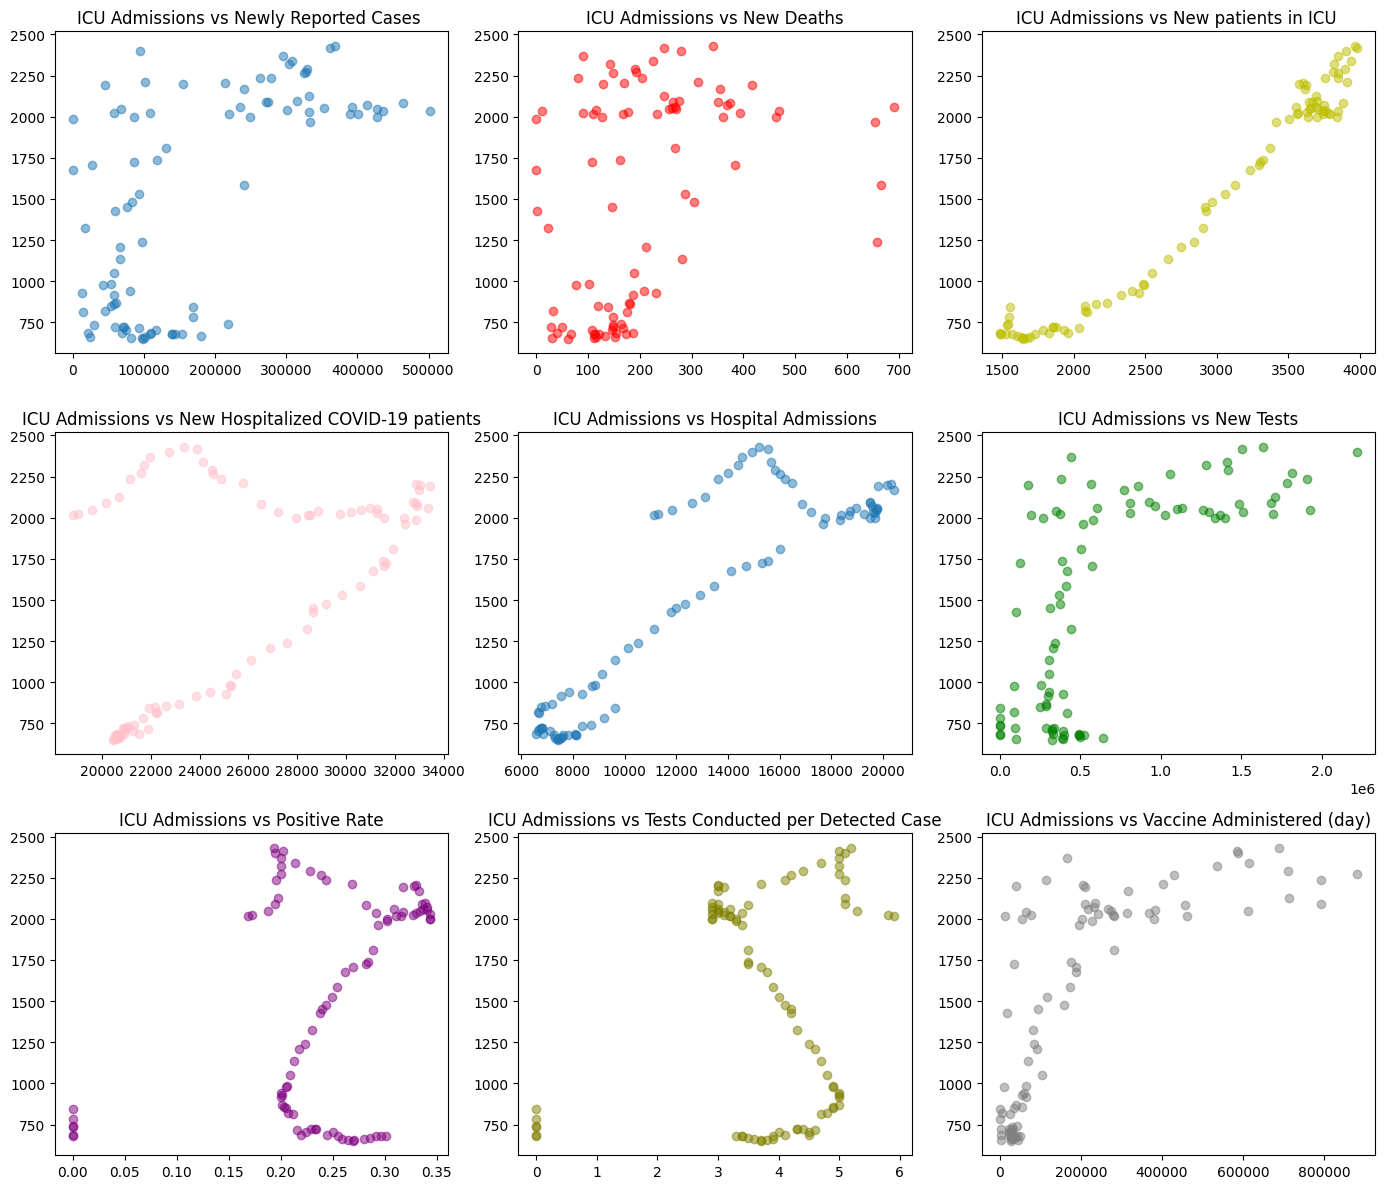

In [154]:
# create scatter plot 
fig, axes = plt.subplots(3, 3, figsize=(14, 12))


# ICU Admissions vs Number of Newly Reported Cases 
axes[0, 0].scatter(
    daily_weekly_data['new_cases'], 
    daily_weekly_data['weekly_icu_admissions'], 
    alpha=0.5
)
axes[0, 0].set_title('ICU Admissions vs Newly Reported Cases ')

# ICU Admissions vs New Deaths
axes[0, 1].scatter(
    daily_weekly_data['new_deaths'],
    daily_weekly_data['weekly_icu_admissions'],
    alpha=0.5,
    color='r'
)
axes[0, 1].set_title('ICU Admissions vs New Deaths')

# ICU Admissions vs New patients in ICU 
axes[0, 2].scatter(
    daily_weekly_data['icu_patients'],
    daily_weekly_data['weekly_icu_admissions'],
    alpha=0.5,
    color='y'
)
axes[0, 2].set_title('ICU Admissions vs New patients in ICU ')

# ICU Admissions vs New Hospitalized COVID-19 patients 
axes[1, 0].scatter(
    daily_weekly_data['hosp_patients'],
    daily_weekly_data['weekly_icu_admissions'],
    alpha=0.5,
    color='pink'
)
axes[1, 0].set_title('ICU Admissions vs New Hospitalized COVID-19 patients')

# ICU Admissions vs Hospital Admissions
axes[1, 1].scatter(
    daily_weekly_data['weekly_hosp_admissions'], 
    daily_weekly_data['weekly_icu_admissions'], 
    alpha=0.5
)
axes[1, 1].set_title('ICU Admissions vs Hospital Admissions')

# ICU Admissions vs New Tests
axes[1, 2].scatter(
    daily_weekly_data['new_tests'],
    daily_weekly_data['weekly_icu_admissions'], 
    alpha=0.5, 
    color='g'
)
axes[1, 2].set_title('ICU Admissions vs New Tests')

# ICU Admissions vs Positive Rate
axes[2, 0].scatter(
    daily_weekly_data['positive_rate'], 
    daily_weekly_data['weekly_icu_admissions'], 
    alpha=0.5, 
    color='purple'
)
axes[2, 0].set_title('ICU Admissions vs Positive Rate')

# ICU Admissions vs Number of Tests Conducted per Detected Case
axes[2, 1].scatter(
    daily_weekly_data['tests_per_case'], 
    daily_weekly_data['weekly_icu_admissions'], 
    alpha=0.5, 
    color='olive'
)
axes[2, 1].set_title('ICU Admissions vs Tests Conducted per Detected Case')

# ICU Admissions vs Number of Vaccine Administered (day)
axes[2, 2].scatter(
    daily_weekly_data['new_vaccinations'], 
    daily_weekly_data['weekly_icu_admissions'], 
    alpha=0.5, 
    color='gray'
)
axes[2, 2].set_title('ICU Admissions vs Vaccine Administered (day)')

plt.tight_layout()
plt.show()

### Compute the correlation Matrix 

I've decided to compute the `correlation Matrix` in order to study the pairwise correlation between all variables.


In [155]:
correlation_matrix = daily_weekly_data.corr()

# display the correlation matrix 
correlation_matrix

,new_cases,new_deaths,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,new_tests,positive_rate,tests_per_case,new_vaccinations
new_cases,1.000000,0.330447,0.600067,0.253284,0.633873,0.643687,0.559242,0.279668,-0.136866,0.581824
new_deaths,0.330447,1.000000,0.399354,0.437245,0.376286,0.422593,0.368309,0.260559,0.004426,0.324333
icu_patients,0.600067,0.399354,1.000000,0.584897,0.979357,0.873466,0.683699,0.456023,0.247258,0.701220
hosp_patients,0.253284,0.437245,0.584897,1.000000,0.537492,0.792188,0.102008,0.611682,-0.199667,0.075954
weekly_icu_admissions,0.633873,0.376286,0.979357,0.537492,1.000000,0.888834,0.693721,0.392699,0.151787,0.732061
weekly_hosp_admissions,0.643687,0.422593,0.873466,0.792188,0.888834,1.000000,0.532592,0.563689,-0.167587,0.502710
new_tests,0.559242,0.368309,0.683699,0.102008,0.693721,0.532592,1.000000,0.295676,0.244082,0.903187
positive_rate,0.279668,0.260559,0.456023,0.611682,0.392699,0.563689,0.295676,1.000000,0.261102,0.117960
tests_per_case,-0.136866,0.004426,0.247258,-0.199667,0.151787,-0.167587,0.244082,0.261102,1.000000,0.254254
new_vaccinations,0.581824,0.324333,0.701220,0.075954,0.732061,0.502710,0.903187,0.117960,0.254254,1.000000


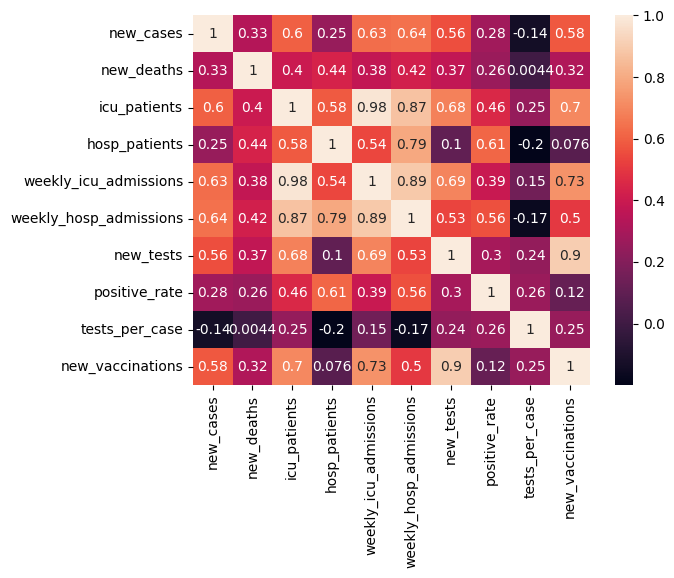

In [156]:
# plot the correlation matrix 
ax = sns.heatmap(
    correlation_matrix, 
    annot=True
)

#### Anaylsis based on target variable `weekly_icu_admissions`:

$$
\begin{array}{|l|c|l|}
    \hline
    \textbf{Variable} & \textbf{Correlation} & \textbf{Interpretation} \\
    \hline
    \text{icu\_patients} & 0.979 & \text{Very strong positive correlation. More ICU admissions mean a higher number of ICU patients.} \\
    \text{weekly\_hosp\_admissions} & 0.889 & \text{Strong positive correlation. More hospital admissions usually lead to more ICU admissions.} \\
    \text{hosp\_patients} & 0.537 & \text{Moderate correlation. A rise in ICU admissions increases total hospital occupancy, but not all hospital patients require ICU.} \\
    \text{new\_cases} & 0.634 & \text{Moderate correlation. More cases typically increase ICU admissions but not all cases are severe.} \\
    \text{new\_deaths} & 0.376 & \text{Weak correlation. Deaths result from severe cases but are not directly linked to weekly ICU admissions in a strong way.} \\
    \text{positive\_rate} & 0.393 & \text{Weak-to-moderate correlation. A higher positive rate may indicate worsening outbreaks, but ICU admissions also depend on hospital policies.} \\
    \text{new\_tests} & 0.694 & \text{Strong positive correlation. More testing can indicate better case detection, leading to early ICU admissions.} \\
    \text{tests\_per\_case} & 0.152 & \text{Very weak correlation. The number of tests per detected case has little direct effect on ICU admissions.} \\
    \text{new\_vaccinations} & 0.732 & \text{Strong positive correlation. This might indicate that areas with more ICU admissions ramp up vaccinations in response to severe outbreaks.} \\
    \hline
\end{array}
$$


## Simple Linear Regression 

In [157]:
# define variables
X = daily_weekly_data[['weekly_hosp_admissions', 'new_deaths', 'new_tests']]
Y = daily_weekly_data['weekly_icu_admissions']

# store results
results = []

for feature in X.columns : 
    # split data into training (80%) and testing (20%)
    X_train, X_test, Y_train, Y_test = train_test_split(
        X[[feature]], 
        Y, 
        test_size=0.2, 
        random_state=42
    )

    # fit the model 
    model = LinearRegression()
    model.fit(
        X_train, 
        Y_train
    )

    # make predictions
    Y_hat = model.predict(X_test)

    # compute model performance metrics
    r2 = r2_score(
        Y_test, 
        Y_hat
    )

    mse = mean_squared_error(
        Y_test, 
        Y_hat
    )

    # Store results 
    results.append({
        "Feature": feature,
        "Intercept (β0)": model.intercept_,
        "Slope (β1)": model.coef_[0],
        "R² Score": r2,
        "MSE": mse
    })

# convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
results_df

,Feature,Intercept (β0),Slope (β1),R² Score,MSE
0,weekly_hosp_admissions,-40.548382,0.120649,0.718406,105233.143496
2,new_tests,932.725068,0.000805,0.351144,242480.556758
1,new_deaths,1083.232619,1.825289,-0.082760,404632.583437


#### Conclusion : 
1- Best Model: `weekly_hosp_admissions`
- Highest `R² score (0.718)` → Explains 71.8% of the variance.
- Lowest `MSE (105233.14349646636)` → More accurate predictions.
- `Interpretation`: The number of hospital admissions strongly influences ICU admissions.

2- Weak Model: `new_deaths`
- `Negative R² (-0.08)` → The model performs worse than a baseline mean prediction.
- `High MSE (404632.5834366851)` → Large prediction errors.
- `Conclusion`: new_deaths is not a good predictor.

3- Moderate Model: `new_tests`
- `R² of 0.35` → Explains 35% of variance, which is weaker but still informative.
- `Interpretation`: More tests are somewhat correlated with ICU admissions, but other factors play a larger role.

## Multiple Linear Regression 

The purpose is to build a simple linear regression in order to predict $ \hat Y $ : `weekly_icu_admissions`.

In [158]:
# define variables
X_i = daily_weekly_data[['new_cases', 'new_deaths', 'icu_patients', 'hosp_patients', 'weekly_hosp_admissions', 'new_tests', 'positive_rate', 'tests_per_case', 'new_vaccinations']]
Y = daily_weekly_data['weekly_icu_admissions']

# split data into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(
    X_i, 
    Y, 
    test_size=0.2, 
    random_state=42
)

# fit the model 
model_multiple = LinearRegression()
model_multiple.fit(
    X_train, 
    Y_train
)

# ,make predictions
Y_hat = model_multiple.predict(X_test)

# compute model performance metrics
r2 = r2_score(
    Y_test, 
    Y_hat
)

mse = mean_squared_error(
    Y_test, 
    Y_hat
)

# Display results 
print(f"Intercept (β0): {model_multiple.intercept_}")
print(f"Slope Coefficients (β1, β9): {model_multiple.coef_}")
print(f"R² Score: {r2}")
print(f"MSE: {mse}")

Intercept (β0): 152.56785592506253
Slope Coefficients (β1, β9): [-4.22019746e-04  3.53994530e-02  3.19164531e-01 -4.01910072e-02
  1.16831247e-01 -1.78491186e-04 -9.06852955e+02  7.20061649e+01
  4.88898423e-04]
R² Score: 0.987931262628191
MSE: 4510.142880632387


In [159]:
# check feature importance 
feature_importance = pd.DataFrame({
    "Feature": X_i.columns, 
    "Coefficient": model_multiple.coef_
}).sort_values(by="Coefficient", ascending=False)

feature_importance

,Feature,Coefficient
7,tests_per_case,72.006165
2,icu_patients,0.319165
4,weekly_hosp_admissions,0.116831
1,new_deaths,0.035399
8,new_vaccinations,0.000489
5,new_tests,-0.000178
0,new_cases,-0.000422
3,hosp_patients,-0.040191
6,positive_rate,-906.852955


I can identify that `positive_rate` and `tests_per_case` have the biggest influence on ICU admission.

#### Statistical Significance Analysis 

After some documentation that i've done, i've found that `LinearRegression` from Scikit-Learn does not provide `p-values` directly, so as solution i've found that i can use `Statsmodels` to perform an Ordinary Least Squares (OLS) Regression, which provides p-values.

In [161]:
# add a constant term for the intercept
X_i = sm.add_constant(X_i)

# fit OLS regression model
ols_model = sm.OLS(Y, X_i).fit()

# display statistical summary
print(ols_model.summary())

                              OLS Regression Results                             
Dep. Variable:     weekly_icu_admissions   R-squared:                       0.992
Model:                               OLS   Adj. R-squared:                  0.991
Method:                    Least Squares   F-statistic:                     1037.
Date:                   Fri, 31 Jan 2025   Prob (F-statistic):           6.07e-79
Time:                           01:57:41   Log-Likelihood:                -495.05
No. Observations:                     90   AIC:                             1010.
Df Residuals:                         80   BIC:                             1035.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- My multiple regression model explains `99.2%` of the variance in `weekly_icu_admissions`, as indicated by $ {R^2} $.

#### Overall Model Significance : 
- `F-statistic:` 1037 (very high)

- `Prob (F-statistic)`: 6.07e-79 (p < 0.05, meaning the model is statistically significant)

- `Conclusion`: The model as a whole strongly predicts ICU admissions.

#### Evaluating Individual Predictors (P-Values)
$$
\begin{array}{|l|c|c|l|}
    \hline
    \textbf{Feature} & \textbf{Coefficient} & \textbf{P-Value} & \textbf{Interpretation} \\
    \hline
    \text{Intercept (const)} & 161.38 & 0.032 & \text{Statistically significant (p < 0.05)} \\
    \text{new\_cases} & -0.0004 & 0.000 & \text{Highly significant} \\
    \text{new\_deaths} & 0.0912 & 0.130 & \text{Not significant (p > 0.05)} \\
    \text{icu\_patients} & 0.3075 & 0.000 & \text{Highly significant} \\
    \text{hosp\_patients} & -0.0410 & 0.000 & \text{Highly significant} \\
    \text{weekly\_hosp\_admissions} & 0.1176 & 0.000 & \text{Highly significant} \\
    \text{new\_tests} & -0.0002 & 0.000 & \text{Highly significant} \\
    \text{positive\_rate} & -905.63 & 0.002 & \text{Significant} \\
    \text{tests\_per\_case} & 75.45 & 0.002 & \text{Significant} \\
    \text{new\_vaccinations} & 0.0005 & 0.000 & \text{Highly significant} \\
    \hline
\end{array}
$$

### Conclusion 
`new_deaths` is not statistically significant ($ p=0.130 > 0.5 $). As result, i'll remove it from the model.


##  Handle Insignificant Predictors & Multicollinearity

#### Remove Insignificant Predictor `new_deaths`

In [162]:
X_i_reduced = X_i.drop(columns=["new_deaths"])

# rerun regression
ols_model_reduced = sm.OLS(Y, X_i_reduced).fit()
print(ols_model_reduced.summary())

                              OLS Regression Results                             
Dep. Variable:     weekly_icu_admissions   R-squared:                       0.991
Model:                               OLS   Adj. R-squared:                  0.990
Method:                    Least Squares   F-statistic:                     1147.
Date:                   Fri, 31 Jan 2025   Prob (F-statistic):           5.50e-80
Time:                           02:19:37   Log-Likelihood:                -496.35
No. Observations:                     90   AIC:                             1011.
Df Residuals:                         81   BIC:                             1033.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Overall Model Performance : 
- `R² Score`: 0.991 (previously 0.992) Slight decrease in explanatory power, but still very strong.

- `Adjusted R²`: 0.990 (previously 0.991) Adjusted R² is almost the same, meaning that removing new_deaths did not significantly impact the model.

- `F-Statistic`: 1147 (previously 1037) Model is still highly significant.

- `Prob(F-Statistic)`: 5.50e-80 (p < 0.05) Model remains statistically significant.